In [1]:
import sympy
from sympy.plotting import plot
import sympy as sp
import penbegone as pbg
from penbegone import common as bgcom
from penbegone import plotting as bgplot
from penbegone.common import printeq

%matplotlib inline
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

## System definition

In [2]:
V, a, de, dt = sp.symbols("V a de dt")
V_star, a_star = sp.symbols("V_star a_star")
k, rho, S, C_D0, C_Da, C_m0, C_ma, C_mde, V_p = sp.symbols("k, rho, S, C_D0, C_Da, C_m0, C_ma, C_mde, V_p")
K_V, V_d, K_a, a_d = sp.symbols("K_V, V_d, K_a, a_d")

In [3]:
V_dot_ = 0.5*rho*V**2*S*(C_D0 + C_Da*a) + k*dt
alpha_dot_ = 0.5*rho*V**2*S*(C_m0 + C_ma*a + C_mde*de)

Sys = [V_dot_, alpha_dot_]
states = [V, a]
states_tr = [V_star, a_star]

## Controller

In [4]:
dt_ = K_V*(V_d - V)
de_ = K_a*(a_d - a)
C = {dt: dt_, de: de_}

## Autonomous system

In [5]:
Sys_a = [s_i.subs(C).simplify() for s_i in Sys]
Sys_a

[-K_V*k*(V - V_d) + 0.5*S*V**2*rho*(C_D0 + C_Da*a),
 0.5*S*V**2*rho*(C_m0 + C_ma*a - C_mde*K_a*(a - a_d))]

## Equilibrium points

In [6]:
e_points = sp.solve(Sys_a, states, dict=True)
e_points

[{V: K_V*k*(C_ma - C_mde*K_a)/(S*rho*(C_D0*C_ma - C_D0*C_mde*K_a - C_Da*C_m0 - C_Da*C_mde*K_a*a_d)) - sqrt(K_V*k*(C_ma - C_mde*K_a)*(-2.0*C_D0*C_ma*S*V_d*rho + 2.0*C_D0*C_mde*K_a*S*V_d*rho + 2.0*C_Da*C_m0*S*V_d*rho + 2.0*C_Da*C_mde*K_a*S*V_d*a_d*rho + C_ma*K_V*k - C_mde*K_V*K_a*k))/(S*rho*(C_D0*C_ma - C_D0*C_mde*K_a - C_Da*C_m0 - C_Da*C_mde*K_a*a_d)),
  a: -(C_m0 + C_mde*K_a*a_d)/(C_ma - C_mde*K_a)},
 {V: K_V*k*(C_ma - C_mde*K_a)/(S*rho*(C_D0*C_ma - C_D0*C_mde*K_a - C_Da*C_m0 - C_Da*C_mde*K_a*a_d)) + sqrt(K_V*k*(C_ma - C_mde*K_a)*(-2.0*C_D0*C_ma*S*V_d*rho + 2.0*C_D0*C_mde*K_a*S*V_d*rho + 2.0*C_Da*C_m0*S*V_d*rho + 2.0*C_Da*C_mde*K_a*S*V_d*a_d*rho + C_ma*K_V*k - C_mde*K_V*K_a*k))/(S*rho*(C_D0*C_ma - C_D0*C_mde*K_a - C_Da*C_m0 - C_Da*C_mde*K_a*a_d)),
  a: -(C_m0 + C_mde*K_a*a_d)/(C_ma - C_mde*K_a)}]

In [7]:
sol_idx = 1
states_trim = {k: x.simplify() for k, x in e_points[sol_idx].items()}  # Ignoring the other solution.
for s in states_trim.values():
    display(s)

(-K_V*k*(C_ma - C_mde*K_a) - sqrt(K_V*k*(C_ma - C_mde*K_a)*(-2.0*C_D0*C_ma*S*V_d*rho + 2.0*C_D0*C_mde*K_a*S*V_d*rho + 2.0*C_Da*C_m0*S*V_d*rho + 2.0*C_Da*C_mde*K_a*S*V_d*a_d*rho + C_ma*K_V*k - C_mde*K_V*K_a*k)))/(S*rho*(-C_D0*C_ma + C_D0*C_mde*K_a + C_Da*C_m0 + C_Da*C_mde*K_a*a_d))

(-C_m0 - C_mde*K_a*a_d)/(C_ma - C_mde*K_a)

## Translated system

In [8]:
trans_dict = dict()
for i, st in enumerate(states):
    trans_dict[states[i]] = states_tr[i] + states_trim[st]
Sys_tr = [s_i.subs(trans_dict).simplify() for s_i in Sys_a]
for s in Sys_tr:
    display(s)

(K_V*k*(C_ma - C_mde*K_a)*(K_V*k*(C_ma - C_mde*K_a) + S*rho*(V_d - V_star)*(-C_D0*C_ma + C_D0*C_mde*K_a + C_Da*C_m0 + C_Da*C_mde*K_a*a_d) + sqrt(K_V*k*(C_ma - C_mde*K_a)*(-2.0*C_D0*C_ma*S*V_d*rho + 2.0*C_D0*C_mde*K_a*S*V_d*rho + 2.0*C_Da*C_m0*S*V_d*rho + 2.0*C_Da*C_mde*K_a*S*V_d*a_d*rho + C_ma*K_V*k - C_mde*K_V*K_a*k)))*(-C_D0*C_ma + C_D0*C_mde*K_a + C_Da*C_m0 + C_Da*C_mde*K_a*a_d) + 0.5*(C_D0*(C_ma - C_mde*K_a) + C_Da*(-C_m0 - C_mde*K_a*a_d + a_star*(C_ma - C_mde*K_a)))*(-K_V*k*(C_ma - C_mde*K_a) + S*V_star*rho*(-C_D0*C_ma + C_D0*C_mde*K_a + C_Da*C_m0 + C_Da*C_mde*K_a*a_d) - sqrt(K_V*k*(C_ma - C_mde*K_a)*(-2.0*C_D0*C_ma*S*V_d*rho + 2.0*C_D0*C_mde*K_a*S*V_d*rho + 2.0*C_Da*C_m0*S*V_d*rho + 2.0*C_Da*C_mde*K_a*S*V_d*a_d*rho + C_ma*K_V*k - C_mde*K_V*K_a*k)))**2)/(S*rho*(C_ma - C_mde*K_a)*(-C_D0*C_ma + C_D0*C_mde*K_a + C_Da*C_m0 + C_Da*C_mde*K_a*a_d)**2)

0.5*(C_m0*(C_ma - C_mde*K_a) + C_ma*(-C_m0 - C_mde*K_a*a_d + a_star*(C_ma - C_mde*K_a)) + C_mde*K_a*(C_m0 + C_mde*K_a*a_d + (C_ma - C_mde*K_a)*(a_d - a_star)))*(-K_V*k*(C_ma - C_mde*K_a) + S*V_star*rho*(-C_D0*C_ma + C_D0*C_mde*K_a + C_Da*C_m0 + C_Da*C_mde*K_a*a_d) - sqrt(K_V*k*(C_ma - C_mde*K_a)*(-2.0*C_D0*C_ma*S*V_d*rho + 2.0*C_D0*C_mde*K_a*S*V_d*rho + 2.0*C_Da*C_m0*S*V_d*rho + 2.0*C_Da*C_mde*K_a*S*V_d*a_d*rho + C_ma*K_V*k - C_mde*K_V*K_a*k)))**2/(S*rho*(C_ma - C_mde*K_a)*(-C_D0*C_ma + C_D0*C_mde*K_a + C_Da*C_m0 + C_Da*C_mde*K_a*a_d)**2)

## Linearization

In [9]:
A = sp.zeros(len(states_tr), len(states_tr))
zero_state = {st: 0 for st in states_tr}
for i, f in enumerate(Sys_tr):
    for j, x in enumerate(states_tr):
        A[i, j] = sp.diff(f, x).subs(zero_state).simplify()
display(A)

Matrix([
[2.0*sqrt(K_V*k*(-0.5*C_D0*C_ma**2*S*V_d*rho + C_D0*C_ma*C_mde*K_a*S*V_d*rho - 0.5*C_D0*C_mde**2*K_a**2*S*V_d*rho + 0.5*C_Da*C_m0*C_ma*S*V_d*rho - 0.5*C_Da*C_m0*C_mde*K_a*S*V_d*rho + 0.5*C_Da*C_ma*C_mde*K_a*S*V_d*a_d*rho - 0.5*C_Da*C_mde**2*K_a**2*S*V_d*a_d*rho + 0.25*C_ma**2*K_V*k - 0.5*C_ma*C_mde*K_V*K_a*k + 0.25*C_mde**2*K_V*K_a**2*k))/(C_ma - C_mde*K_a),               0.5*C_Da*(K_V*k*(C_ma - C_mde*K_a) + sqrt(K_V*k*(C_ma - C_mde*K_a)*(-2.0*C_D0*C_ma*S*V_d*rho + 2.0*C_D0*C_mde*K_a*S*V_d*rho + 2.0*C_Da*C_m0*S*V_d*rho + 2.0*C_Da*C_mde*K_a*S*V_d*a_d*rho + C_ma*K_V*k - C_mde*K_V*K_a*k)))**2/(S*rho*(-C_D0*C_ma + C_D0*C_mde*K_a + C_Da*C_m0 + C_Da*C_mde*K_a*a_d)**2)],
[                                                                                                                                                                                                                                                                                                                             

In [10]:
A.eigenvals()

{K_V*k*(-1.0*C_D0*C_ma**3*S*V_d*rho + 3.0*C_D0*C_ma**2*C_mde*K_a*S*V_d*rho - 3.0*C_D0*C_ma*C_mde**2*K_a**2*S*V_d*rho + 1.0*C_D0*C_mde**3*K_a**3*S*V_d*rho + 1.0*C_Da*C_m0*C_ma**2*S*V_d*rho - 2.0*C_Da*C_m0*C_ma*C_mde*K_a*S*V_d*rho + 1.0*C_Da*C_m0*C_mde**2*K_a**2*S*V_d*rho + 1.0*C_Da*C_ma**2*C_mde*K_a*S*V_d*a_d*rho - 2.0*C_Da*C_ma*C_mde**2*K_a**2*S*V_d*a_d*rho + 1.0*C_Da*C_mde**3*K_a**3*S*V_d*a_d*rho + 1.0*C_ma**3*K_V*k - 3.0*C_ma**2*C_mde*K_V*K_a*k + 2.0*C_ma**2*sqrt(K_V*k*(-0.5*C_D0*C_ma**2*S*V_d*rho + C_D0*C_ma*C_mde*K_a*S*V_d*rho - 0.5*C_D0*C_mde**2*K_a**2*S*V_d*rho + 0.5*C_Da*C_m0*C_ma*S*V_d*rho - 0.5*C_Da*C_m0*C_mde*K_a*S*V_d*rho + 0.5*C_Da*C_ma*C_mde*K_a*S*V_d*a_d*rho - 0.5*C_Da*C_mde**2*K_a**2*S*V_d*a_d*rho + 0.25*C_ma**2*K_V*k - 0.5*C_ma*C_mde*K_V*K_a*k + 0.25*C_mde**2*K_V*K_a**2*k)) + 3.0*C_ma*C_mde**2*K_V*K_a**2*k - 4.0*C_ma*C_mde*K_a*sqrt(K_V*k*(-0.5*C_D0*C_ma**2*S*V_d*rho + C_D0*C_ma*C_mde*K_a*S*V_d*rho - 0.5*C_D0*C_mde**2*K_a**2*S*V_d*rho + 0.5*C_Da*C_m0*C_ma*S*V_d*rho - 0.5

In [11]:
values_dict = {
    C_D0: -0.03,
    C_Da: -0.3,
    C_m0: -0.02338,
    C_ma: -0.38,
    C_mde: 0.5,
    rho: 1.225,
    S: 0.55,
    V_d: 25,
    a_d: 0.0*3.14/180,
    k: 20,
    K_V: 1,
    K_a: 1,
}
A_num_ = A.subs(values_dict)
display(A_num_)
states_trim_ = [s.subs(values_dict) for s in states_trim.values()]
display(states_trim_)
C_ = [c for c in C.values()]
C_ = [c.subs(states_trim) for c in C_]
C_ = [c.subs(values_dict) for c in C_]
display(C_)

Matrix([
[-20.3676804337166, -62.0186697824019],
[                0, -181.921431361712]])

[24.7722928158329, -0.0265681818181818]

[0.227707184167052, 0.0265681818181818]

## Phase portrait

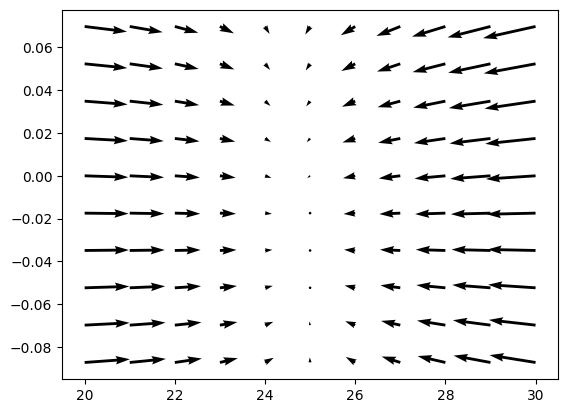

In [12]:
from sympy.utilities.autowrap import ufuncify
import numpy as np
import matplotlib.pyplot as plt
X, Y = np.meshgrid(np.arange(20,31,1), np.arange(-5,5,1)*3.14/180)
uxy = ufuncify((V, a), Sys_a[0].subs(values_dict))
vxy = ufuncify((V, a), Sys_a[1].subs(values_dict))
plt.figure()
plt.quiver(X, Y, uxy(X, Y), vxy(X, Y))